In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C, Vc0, Vcp0, I0, Vin = 10, 0.00025, 0.00003, 0, 0, 0, 5

ts = []
Vcs = []
Is = []

Td = np.linspace(0, 1 / 200000, 100)

for i in range(1000):
    T = np.linspace(i / 200000 * 2, i / 200000 * 2 + 1 / 200000, 100)

    Vc_on = co.tf([R * C * Vc0], [R * C, 1])
    I_on = co.tf([L * I0, Vin], [L, 0, 0])
    _, Vc_on_res = co.impulse_response(Vc_on, T=Td)
    _, I_on_res = co.impulse_response(I_on, T=Td)
    ts += T.tolist()
    Vcs += Vc_on_res.tolist()
    Is += I_on_res.tolist()
    
    Vc0 = Vc_on_res[-1]
    I0 = I_on_res[-1]
    Vcp0 = 1 / C * I_on_res[-1]
    
    T = np.linspace(i / 200000 * 2 + 1 / 200000, i / 200000 * 2 + 2 / 200000, 100)

    Vc_off = co.tf([Vc0, Vcp0 + 1 / (R * C) * Vc0, Vin / (L * C)], [1, 1 / (R * C), 1 / (L * C), 0])
    I_off = co.tf([C, 1 / R], [1]) * Vc_off - co.tf([Vc0 * C], [1])
    _, Vc_off_res = co.impulse_response(Vc_off, T=Td)
    _, I_off_res = co.impulse_response(I_off, T=Td)
    ts += T.tolist()
    Vcs += Vc_off_res.tolist()
    Is += I_on_res.tolist()
    
    Vc0 = Vc_off_res[-1]
    I0 = I_off_res[-1]
    Vcp0 = 1 / C * I_off_res[-1]


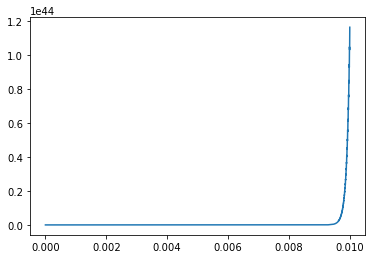

In [3]:
plt.plot(ts, Vcs)

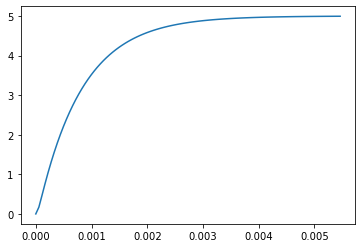

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 10, 0.00033, 0.0000033
Doff= 0.2

G = co.tf([1], [L * C / Doff, 1 / Doff * L / R, Doff])
t, y = co.step_response(G)

plt.plot(t, y)


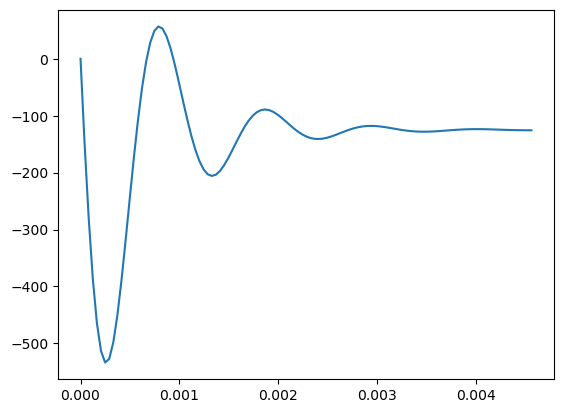

In [58]:
# 0db 주파수 구하기

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 100, 0.00033, 0.0000033
D = 0.8
Vin = 5
Vof = Vin / (1 - D)
ILf = Vof / 2

G = co.tf([-ILf * L, -(1 - D) * Vof], [L * C, L / R, (1 - D) ** 2])

mag, phase, omega = co.bode(G, omega=np.logspace(-3, 8, 1000))

plt.plot(t, y)

# M_margin_min = 1e15
# w_0db = -1
# for M, phi, w in zip(mag, phase, omega):
#   if np.abs(M - 1) < M_margin_min:
#     M_margin_min = abs(M - 1)
#     w_0db = w




109.47116344829661 91.14484720446342


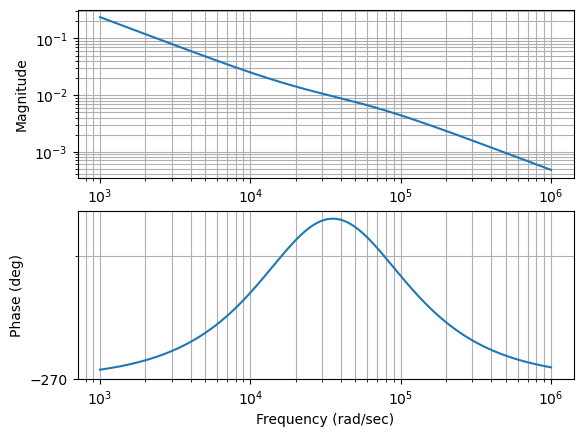

In [56]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R1, R2, R4, C1, C3 = 2100, 40, 400, 0.000001, 0.000001

Gc = -co.tf([R2 * C1, 1], [R1 * C1 * C3 * R2, (C1 + C3) * R1, 0])

mag, phase, omega = co.bode(Gc)
print(np.max(phase * 180 / np.pi + 360), np.min(phase * 180 / np.pi + 360))

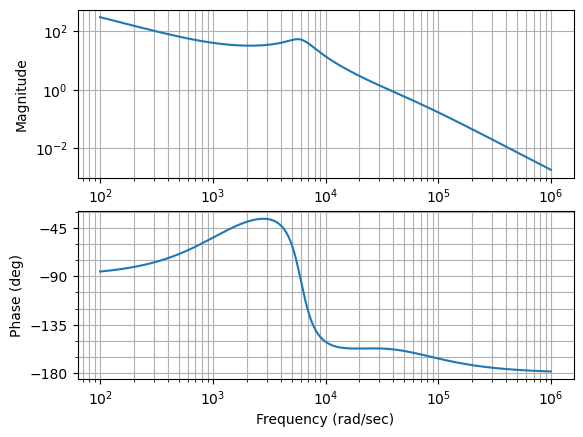

In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

GH = G * Gc

mag, phase, omega = co.bode(GH)